**Tutorial de pandas. Biblioteca para la manipulación datos.**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car.data', header=None)

In [3]:
data.columns = ['Price', 'Maintenance Cost', 'Number de Doors', 'Capacity', 'Size of Luggage Boot', 'Safety', 'Decision']

In [4]:
data.head(5)

,Price,Maintenance Cost,Number de Doors,Capacity,Size of Luggage Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.tail(5)

,Price,Maintenance Cost,Number de Doors,Capacity,Size of Luggage Boot,Safety,Decision
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
data.sample(5)

,Price,Maintenance Cost,Number de Doors,Capacity,Size of Luggage Boot,Safety,Decision
271,vhigh,med,4,2,small,med,unacc
1265,med,low,4,more,med,high,vgood
571,high,high,3,2,med,med,unacc
329,vhigh,low,2,2,med,high,unacc
1506,low,high,5more,more,med,low,unacc


In [7]:
data.describe()

,Price,Maintenance Cost,Number de Doors,Capacity,Size of Luggage Boot,Safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
# Mostrar cuantos atributos tiene
data.shape

(1728, 7)

In [9]:
# Cuantos datoa tiene el dataFrame
data.size

12096

In [10]:
data['Price'].sample(3)

1150      med
988       med
13      vhigh
Name: Price, dtype: object

In [11]:
data['Price'][:4]

0    vhigh
1    vhigh
2    vhigh
3    vhigh
Name: Price, dtype: object

In [12]:
data[['Price', 'Decision']].tail()

,Price,Decision
1723,low,good
1724,low,vgood
1725,low,unacc
1726,low,good
1727,low,vgood


In [13]:
decision = data['Decision'].value_counts()

print(decision)

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


In [14]:
data['Decision'].value_counts().sort_index(ascending=False)

vgood      65
unacc    1210
good       69
acc       384
Name: Decision, dtype: int64

<AxesSubplot:>

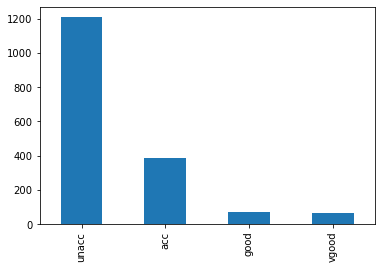

In [15]:
# Generar un distribución de los datos con un histograma
decision.plot(kind='bar')

In [16]:
data['Price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [28]:
# Cambiamos los valores guardados en las celdas de 'Price' por númericos
data['Price'].replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace=True)
data['Maintenance Cost'].replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace=True)
data['Number de Doors'].replace(('2', '3', '4', '5more'), (1, 2, 3, 4), inplace=True)
data['Capacity'].replace(('2', '3', 'more'), (1, 2, 3), inplace=True)
data['Size of Luggage Boot'].replace(('small', 'med', 'big'), (1, 2, 3), inplace=True)
data['Safety'].replace(('low', 'med', 'high'), (1, 2 , 3), inplace=True)

data['Price'].unique()
data['Maintenance Cost'].unique()

array([4, 3, 2, 1], dtype=int64)

In [30]:
data['Decision'].replace(('unacc', 'acc', 'good', 'vgood'), (1, 2, 3, 4), inplace=True)
data['Decision'].unique()

array([1, 2, 4, 3], dtype=int64)

In [32]:
data.columns = ['price', 'maintenance', 'n_doors', 'capacity', 'size_lug', 'safety', 'class']

In [33]:
data.head(5)

,price,maintenance,n_doors,capacity,size_lug,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


In [18]:
data['Price'].head()

0    4
1    4
2    4
3    4
4    4
Name: Price, dtype: int64

In [19]:
price = data['Price'].value_counts()

Text(0.5, 1.0, 'Precio de los autos')

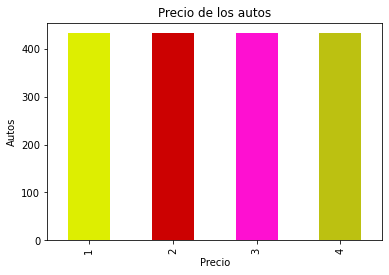

In [20]:
colors = ['#ddee01', '#cc0101', '#fe10d1', '#bcc111']
price.plot(kind='bar', color=colors)
plt.xlabel('Precio')
plt.ylabel('Autos')
plt.title('Precio de los autos')

In [21]:
data['Safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [22]:
data['Safety'].value_counts()

low     576
high    576
med     576
Name: Safety, dtype: int64

In [23]:
labels = ['low', 'med', 'high']

In [24]:
size = [576, 576, 576]
colors = ['cyan', 'gray', 'orange']
explode = [0.2, 0, 0]

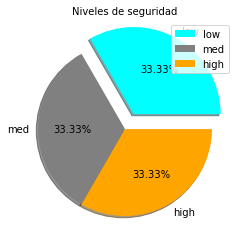

In [25]:
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct='%.2f%%')
plt.title('Niveles de seguridad', fontsize=10)
plt.axis('off')
plt.legend(loc='best')
plt.show()

### Recomendación de división de datos
- 80% aprendizaje
- 20% pruebas

In [36]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [38]:
dataset = data.values
X = dataset[:, 0:6]
Y = np.asarray(dataset[:, 6], dtype='S6')

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [40]:
tr = tree.DecisionTreeClassifier(max_depth=10)

In [41]:
tr.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [42]:
y_pred = tr.predict(X_test)

In [43]:
y_pred

array([b'2', b'1', b'1', b'1', b'1', b'3', b'1', b'2', b'2', b'1', b'1',
       b'1', b'2', b'1', b'1', b'2', b'1', b'1', b'2', b'1', b'3', b'2',
       b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'3', b'2', b'1',
       b'2', b'3', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'4', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'1', b'1', b'1', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'2',
       b'1', b'1', b'1', b'1', b'1', b'2', b'1', b'2', b'2', b'2', b'1',
       b'2', b'2', b'1', b'2', b'2', b'1', b'1', b'1', b'1', b'1', b'3',
       b'1', b'1', b'1', b'2', b'1', b'1', b'1', b'4', b'1', b'2', b'2',
       b'1', b'1', b'1', b'2', b'1', b'4', b'2', b'1', b'2', b'1', b'1',
       b'1', b'1', b'1', b'2', b'1', b'3', b'1', b'1', b'1', b'1', b'1',
       b'1', b'2', b'1', b'1', b'1', b'1', b'2', b'3', b'1', b'1', b'1',
       b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'2', b'1', b'1', b'2', b'1', b'2', b'2', b'

In [44]:
score = tr.score(X_test, Y_test)

In [47]:
print('Precision: %0.4f' % (score))

Precision: 0.9740
